## Pytorch Workflow:

In [39]:
what_were_covering = {1: 'data (preparation and loading)',
                    2: 'build a model',
                    3: 'train a model',
                    4: 'evaluate a model',
                    5: 'save and load a model',
                    6: 'put it all together',}



In [40]:
import torch
from torch import nn #nn contains all the modules needed to build a neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.1+cpu'

## 1. Preparing and loading data
Data can be almost anything.... as long as you convert it to numbers

* Excel
* Images
* Videos
* DNA
* Audio
* Text

Machine learning / deep learning consists of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula. 
We'll use a linear regression formula to make a straight line with *known* **parameters**


In [41]:
# Create *known* parameters
import torch
weight = 0.7
bias = 0.3

# Create *unknown* parameters
start = 0.0
end = 1.0
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [42]:
len(X), len(y)

(50, 50)

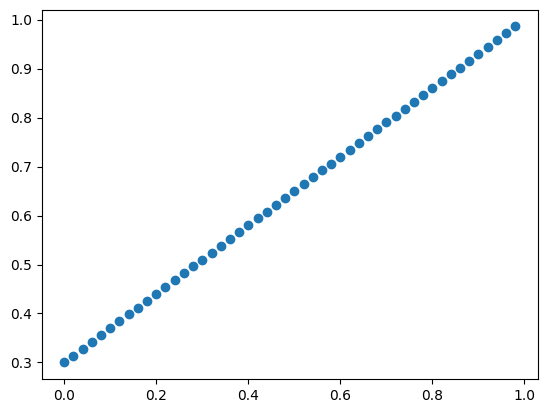

In [43]:
# Plot the data
plt.scatter(X, y, label='y')

### Splitting data into training and testing data


In [44]:
# Create a training and testing split of the data
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [45]:
# Plot the training set in blue and testing set in red

from turtle import color
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

    # Plot the training set in blue and testing set in red
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='r', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', label='Predictions')

## Building My 'First' PyTorch Model

What are model does:
1. Start with random values (weights * bias)
2. Look at training data and adjust the values to get closer the the ideal values (the weight & bias)


Does this through 2 main things:
1. Gradient Descent
2. Backpropagation 

In [46]:
from torch import nn
# Create a linear regression model

class LinearRegression(nn.Module): #nn.Module is the base class for all neural network modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Forward Method to define the computation performed in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias #y = wx + b

### Taking a look behind the curtain to see the parameters

Now that we've created our model, let's check to see what the parameters are.

We can use `.parameters` to see the parameters of the model.

In [71]:
# Create our first model by calling the class LinearRegression
# Create a manual seed for reproducibility

import torch
torch.manual_seed(42)

# Create a model
model_0 = LinearRegression()

# Print the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [72]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()` 

Let's see how well our model works at making predictions at y_test using X_test

When we pass data through our model it will pass it through our forward method

In [73]:
#Make a prediction of the model without training
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

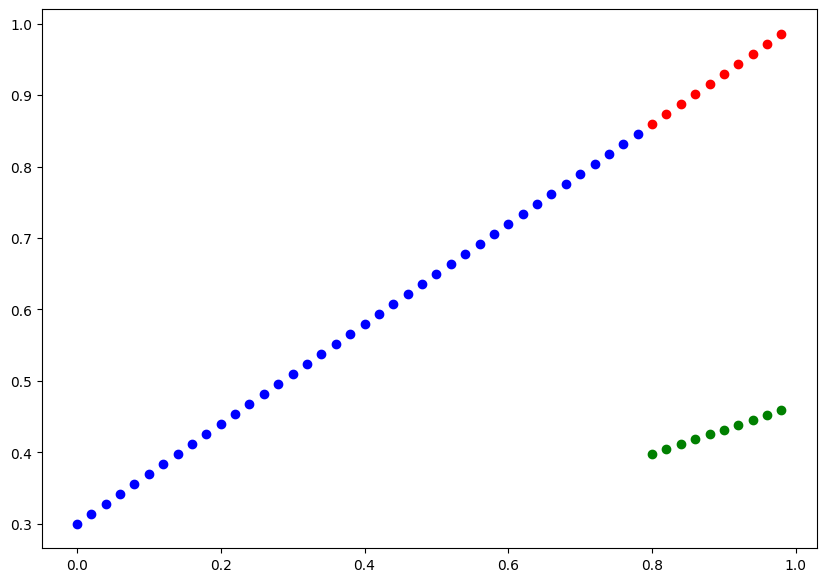

In [74]:
plot_predictions(predictions=y_preds)


In [75]:
#Set up a loss function
loss_fn =nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.AdamW(params=model_0.parameters(), lr=1e-2)

In [76]:
# Set up manual seed
from pyexpat import model
from matplotlib.pylab import f


torch.manual_seed(42)

# An epoch is one loop through the entire training dataset.
epochs = 200 

# Tracking experiments
epoch_count = []
loss_values = []
test_loss_values = []

# Step 1: Loop through the entire training dataset.
for epoch in range(epochs):
    # Set the model to the training model
    # Sets all parameters to require gradients
    model_0.train()
    
    # Step 2: Forward pass using the forward() function
    y_preds = model_0(X_train)
    
    # Step 3: Calculate the loss using the loss function
    loss = loss_fn(y_preds, y_train)
    #print(f'Loss: {loss}')
    
    # Step 4: Calculate the zero grad
    optimizer.zero_grad()
    
    # Step 5: Loss backward - use back propagation to calculate the gradients
    loss.backward()
    
    # Step 6: Step the optimizer - attempt to optimize the weights and bias to reduce the loss
    optimizer.step() # --> By default, the optimizer changes will accumulate throughout the training loop. We have to zero them in step 3 before the next loop
    
    
    model_0.eval() # Turns off different setting in the model not needed for evaluation/ testing
    with torch.inference_mode(): # Turns off gradient tracking & a couple more things
        # 1. Do a forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            
            print(f'Epoch {epoch} | Loss: {loss} | Test loss: {test_loss}')
            print(model_0.state_dict())


Epoch 0 | Loss: 0.31288138031959534 | Test loss: 0.4756790101528168
OrderedDict([('weights', tensor([0.3467])), ('bias', tensor([0.1388]))])
Epoch 10 | Loss: 0.17420396208763123 | Test loss: 0.2872113585472107
OrderedDict([('weights', tensor([0.4463])), ('bias', tensor([0.2386]))])
Epoch 20 | Loss: 0.0427502803504467 | Test loss: 0.10004236549139023
OrderedDict([('weights', tensor([0.5457])), ('bias', tensor([0.3373]))])
Epoch 30 | Loss: 0.04433634132146835 | Test loss: 0.0053556859493255615
OrderedDict([('weights', tensor([0.6068])), ('bias', tensor([0.3793]))])
Epoch 40 | Loss: 0.022745070978999138 | Test loss: 0.06396785378456116
OrderedDict([('weights', tensor([0.5864])), ('bias', tensor([0.3371]))])
Epoch 50 | Loss: 0.01736716739833355 | Test loss: 0.04198138788342476
OrderedDict([('weights', tensor([0.6211])), ('bias', tensor([0.3282]))])
Epoch 60 | Loss: 0.00913204811513424 | Test loss: 0.013227934017777443
OrderedDict([('weights', tensor([0.6647])), ('bias', tensor([0.3182]))])

In [77]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6974])), ('bias', tensor([0.2997]))])

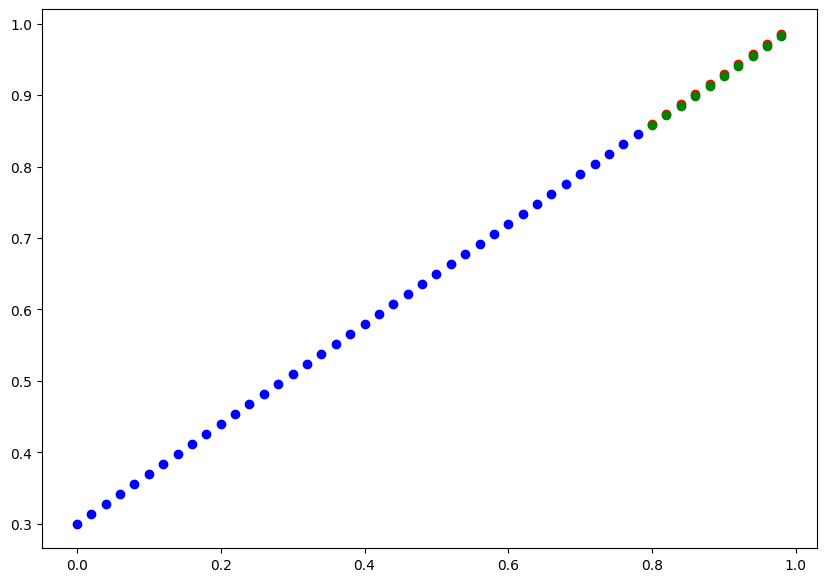

In [78]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    

plot_predictions(predictions=y_preds)

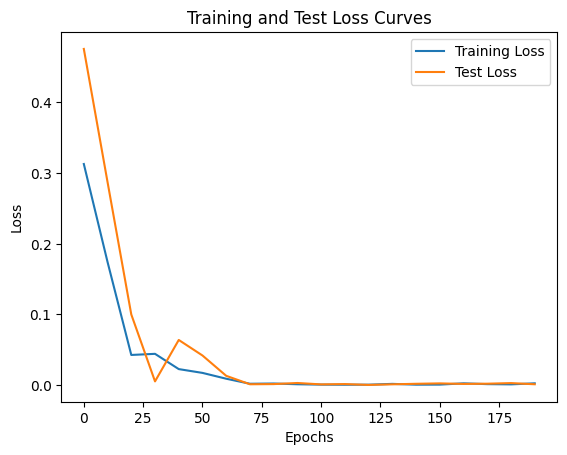

In [79]:
# Plot the loss values over the training loop

import numpy as np
from math import e
import matplotlib.pyplot as plt

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Training Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [80]:
np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.17420396, 0.04275028, 0.04433634, 0.02274507,
       0.01736717, 0.00913205, 0.00202522, 0.0023629 , 0.00129849,
       0.00078149, 0.00063424, 0.00070425, 0.00184085, 0.00071087,
       0.00080121, 0.00261882, 0.0014801 , 0.00114272, 0.00263439],
      dtype=float32)

## Saving a model in PyTorch

There are Three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - Allows you to save a PyTorch object in Python's pickle method
2. `torch.load()` - Allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - Allows you to load a model's saved state dictionary

In [81]:
# Save the PyTorch model

from pathlib import Path

# 1 Create a models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2 Create a model save path

MODEL_NAME = '01_pytorch_workflow_model.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3 Save the model state_dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
        f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model.pt


## Loading a PyTorch Model

Since we saved our model's state_dict() rather than the entire model, wel'll create a new instance of our model class and load the saved `state_dict()` into that

In [88]:
# To load in a saved state_dict, you need to create a new model instance and load the state_dict into it.

import torch
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [89]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6974])), ('bias', tensor([0.2997]))])

In [90]:
# Make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_predictions = loaded_model_0(X_test)
    
loaded_model_predictions

tensor([[0.8577],
        [0.8716],
        [0.8856],
        [0.8995],
        [0.9134],
        [0.9274],
        [0.9413],
        [0.9553],
        [0.9692],
        [0.9832]])

In [91]:
# Compare the loaded model predictions with the original model predictions
y_preds == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together 

Now let's repeat all the steps to really solidify the workflow.

In [124]:
#import torch
#import matplotlib.pyplot as plt
#from torch.utils.data import Dataset
#import pandas as pd
#from sklearn.preprocessing import StandardScaler

#file_name = 'C:\\Users\\jakev\\Data\\sales.csv'

#class MyLinearModel(Dataset):
    
    #def __init__(self, file_name):
        
        #read the csv file and load row data into variables
        #file_out = pd.read_csv(file_name)
        
        # Split the data into training and testing sets (80/20 split)
        #train_size = int(0.8 * len(file_out))
        #test_size = len(file_out) - train_size
        
        # Load the data into variables
        #X = file_out.iloc[:, :-1].values
        #y = file_out.iloc[:, -1].values
        
        #Covert the data to tensors
        #self.X_train = torch.tensor(X[:train_size], dtype=torch.float32)
        #self.y_train = torch.tensor(y[:train_size], dtype=torch.float32)
    
    
    #def __len__(self):
        #return len(self.X_train)
    
    
    #def __getitem__(self, idx):
        #return self.X_train[idx], self.y_train[idx]


In [141]:
# Create some data using the linear regression equation of y = mx +b

from cProfile import label


weight = .867
bias = 1-weight
print(f'Weight: {weight:.3f}, Bias: {bias:.3f}')

# Create a range of values
start = 0.0
end = 1.0
step = 0.02

# Create X and y values (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias
X[:10], y[:10]


Weight: 0.867, Bias: 0.133


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1330],
         [0.1503],
         [0.1677],
         [0.1850],
         [0.2024],
         [0.2197],
         [0.2370],
         [0.2544],
         [0.2717],
         [0.2891]]))

#### Create device agnostic code

This means if we have access to a GPU, our code will run on it. If not, it'll run on a CPU.

In [129]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [130]:
# Split the data into training and testing sets (80/20 split)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

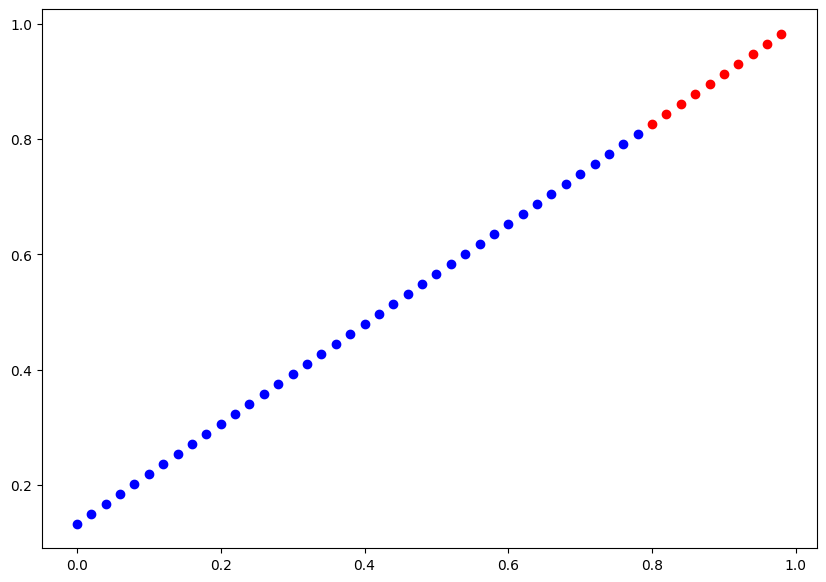

In [131]:
# Plot the data 
from sympy import plot


plot_predictions(X_train,y_train,X_test,y_test)

In [132]:

from ast import mod
import torch
class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                    out_features=1)
    
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
    
# Set the manual seed
torch.manual_seed(42)
model_1 = MyLinearModel()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [135]:
# Set the model to use the GPU if available
# Check the model current device


model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### For Training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [136]:
# Set up the loss function and optimizer

loss_fn = nn.L1Loss()

# Optimizer function

optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=1e-2)

In [138]:
# Create a training loop
from cgi import test
from matplotlib import testing


torch.manual_seed(42)

epochs = 200

# Put data on the device (device agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Define the model

epoch_count = []
training_loss_values = []
testing_loss_values = []

for epoch in range(epochs):
    model_1.train()
    
    # Forward pass
    y_pred = model_1(X_train)
    
    # Compute loss
    loss = loss_fn(y_pred, y_train)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    
    
    ### Testing ###
    
    # Evaluate the model
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    # Visulaize the training and testing loss
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss {loss}, Test Loss: {test_loss}")
        
        # Store the loss values
        epoch_count.append(epoch)
        training_loss_values.append(loss)
        testing_loss_values.append(test_loss)
    

Epoch 0: Loss 0.013989286497235298, Test Loss: 0.031886957585811615
Epoch 10: Loss 0.010550478473305702, Test Loss: 0.023614471778273582
Epoch 20: Loss 0.007119962479919195, Test Loss: 0.016028910875320435
Epoch 30: Loss 0.003685655537992716, Test Loss: 0.007756424136459827
Epoch 40: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 50: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 60: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 70: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 80: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 90: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 100: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 110: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 120: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 130: Loss 0.007743545807898045, Test Loss: 0.006067490670830011
Epoch 140: Loss 0.0077435458078

In [139]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8663]])),
             ('linear_layer.bias', tensor([0.1410]))])

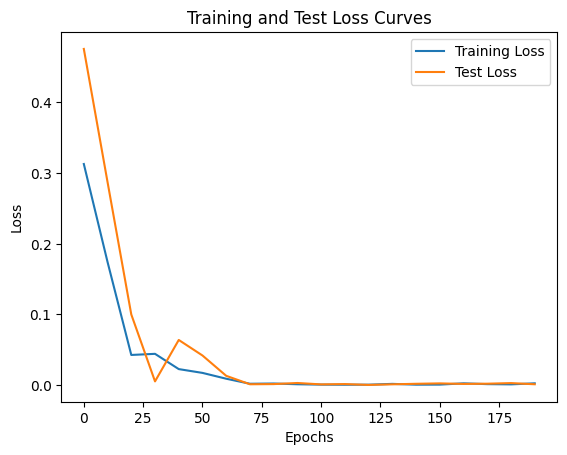

In [144]:
import numpy as np
from math import e
import matplotlib.pyplot as plt

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Training Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

### Making and evaluating predictions

In [145]:
# Turn model into evaluation mode
model_1.eval()

# Make some predictions
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8341],
        [0.8514],
        [0.8687],
        [0.8860],
        [0.9034],
        [0.9207],
        [0.9380],
        [0.9553],
        [0.9727],
        [0.9900]])

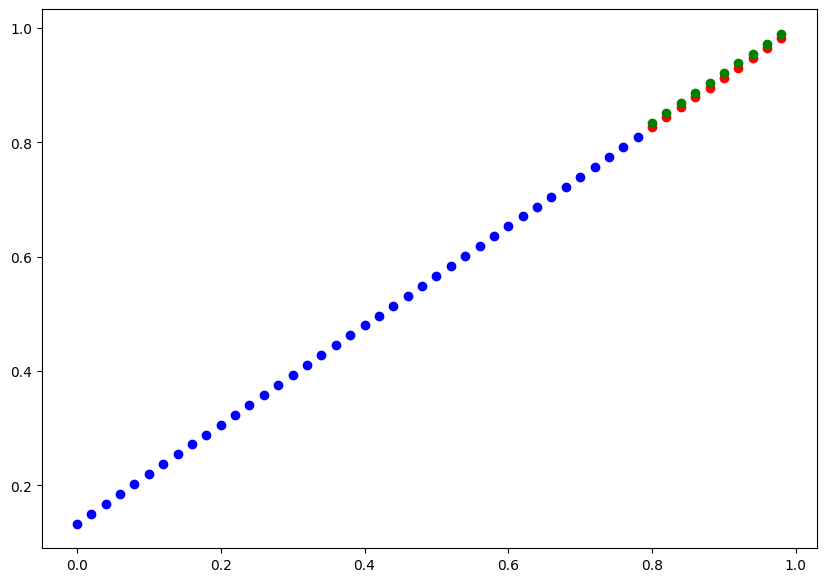

In [146]:
# Check out the model predictions visually
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

### Saving and loading models

In [147]:
from pathlib import Path


MODEL_NAME = '02_pytorch_workflow_model.pt'
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model

torch.save(obj=model_1.state_dict(),
        f = MODEL_SAVE_PATH)


In [151]:
# load the model

from json import load
import pickle
import torch

loaded_model_1 = MyLinearModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the model on the right device

loaded_model_1.to(device)

MyLinearModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [150]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8663]])),
             ('linear_layer.bias', tensor([0.1410]))])

In [152]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])